Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmia) and heart defects you’re born with (congenital heart defects), among others.
Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data science. The amount of data in the healthcare industry is huge.

In this Data Science Project I will be applying Machine Learning techniques to classify whether a person is suffering from Heart Disease or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

We are using the KNN(Kth Nearest Neibourhood) classifier to classify the target variable for heart failure dataset.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Checking the strength of the relationship among the variables using correlatoin heat map

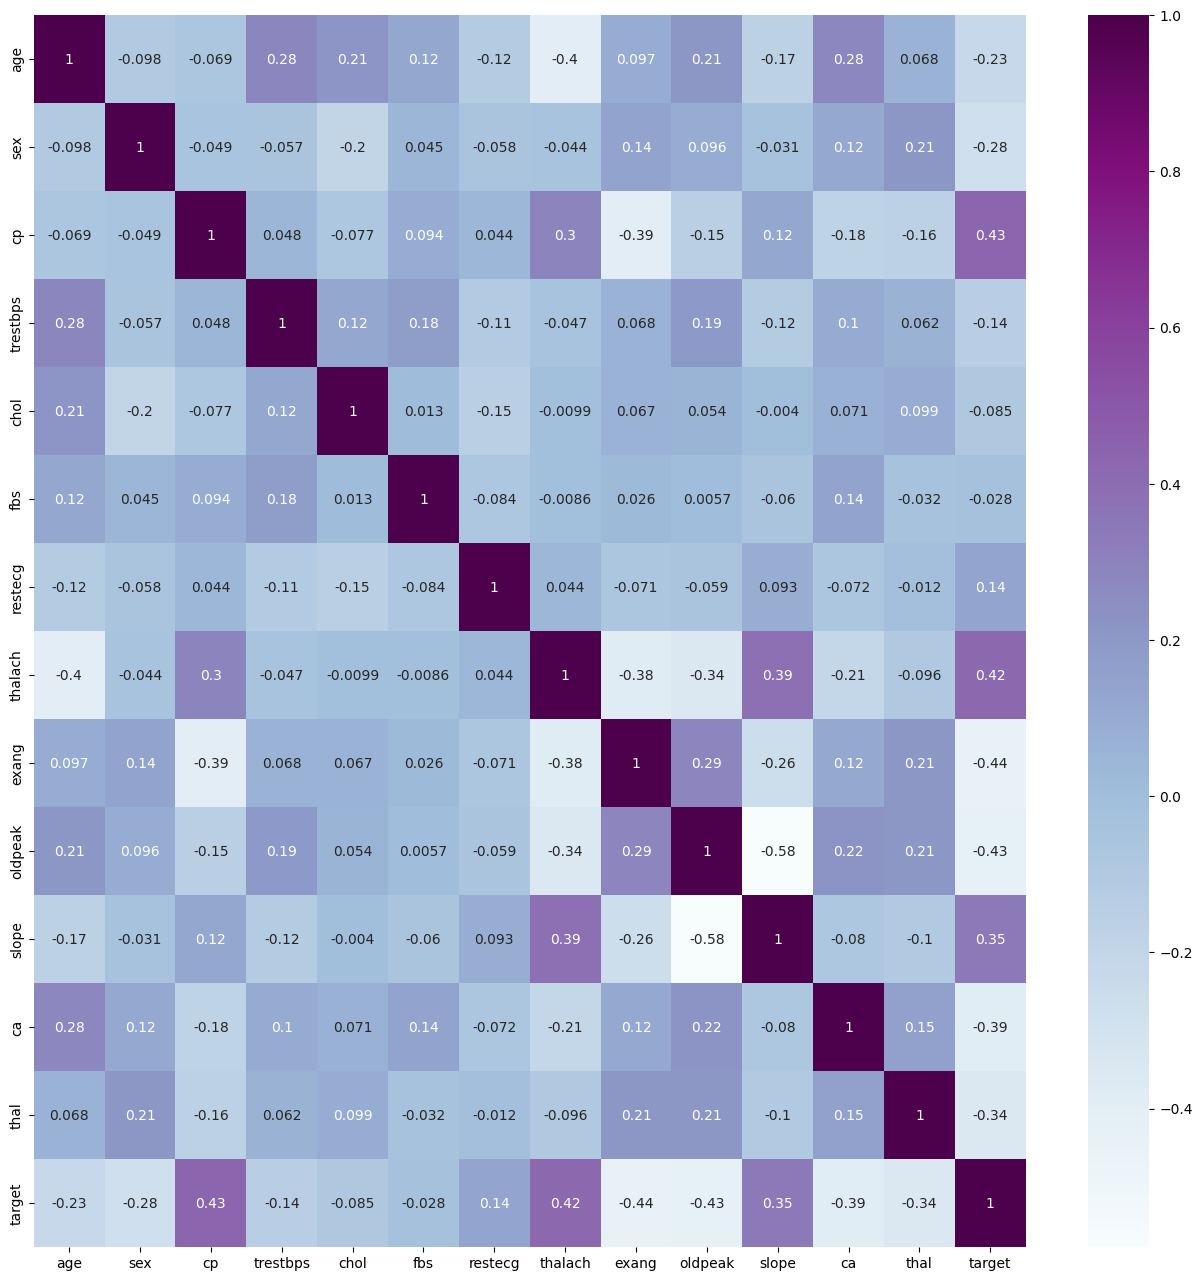

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")
plt.show()

Checking whether our targe variable is more over with equal frequencies to ensure the balance of the data

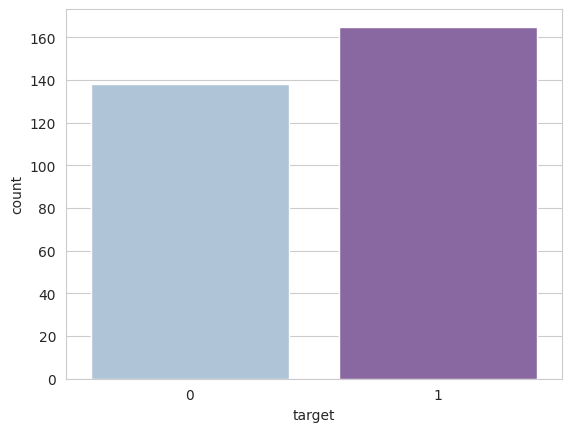

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='BuPu')
plt.show()

**Data Processing**

After exploring the data set, The convertion of categorical variables into dummy variables and scale all the values before training the Machine Learning models.

In [13]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg',
                                      'exang', 'slope', 'ca', 'thal'], drop_first=True)
dataset = dataset.astype(int)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.154475,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.089785,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.219165,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.716145,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.716145,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


Fixing the Dependent variable and independent variables

In [14]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [17]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
knn_scores

[0.7588172043010752,
 0.7721505376344087,
 0.7851612903225806,
 0.7853763440860215,
 0.8017204301075269,
 0.8249462365591398,
 0.8218279569892474,
 0.8052688172043011,
 0.8083870967741935,
 0.7952688172043011,
 0.7918279569892472,
 0.7918279569892472,
 0.7950537634408602,
 0.7886021505376345,
 0.7786021505376344,
 0.7719354838709678,
 0.798494623655914,
 0.7951612903225806,
 0.7984946236559141,
 0.7951612903225806]

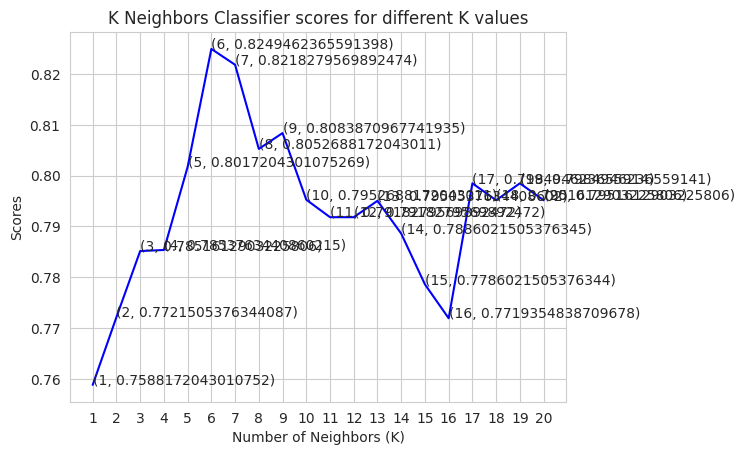

In [18]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

Getting classification metrics (Sensitivity, Specificity, Accuracy and F1 score for KNN model

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# Compute the confusion matrix
y_pred = cross_val_predict(knn_classifier, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Confusion Matrix:
[[105  33]
 [ 30 135]]
Sensitivity (Recall): 0.8181818181818182
Specificity: 0.7608695652173914
Accuracy: 0.7920792079207921
F1 Score: 0.8108108108108109


0.7918279569892472

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

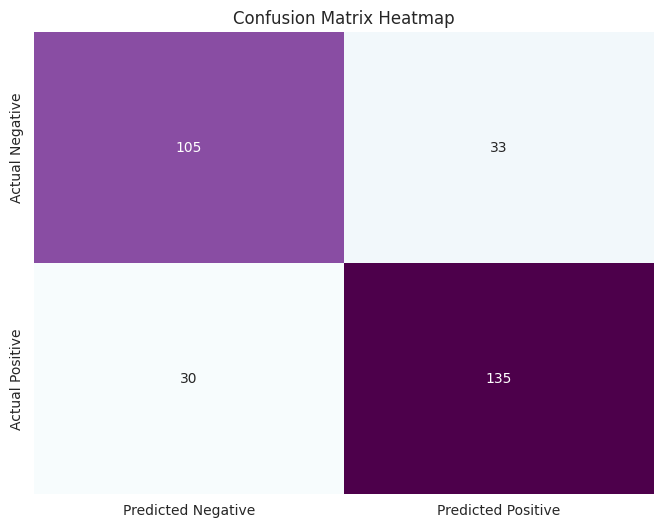

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="BuPu", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')

Using Random Forest Model for Classifying the target variable

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

0.7721505376344087

In [25]:
y_pred = cross_val_predict(randomforest_classifier, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)

# Extract TN, FP, FN, TP from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[108  30]
 [ 32 133]]
Sensitivity (Recall): 0.806060606060606
Specificity: 0.782608695652174
Accuracy: 0.7953795379537953
F1 Score: 0.8109756097560976
